## Capstone 1 - Machine Learning – Predicting Lemon titles (Kicks) in Car Auctions
#### Objective:
> To predict if the car purchased at the auction is a good/bad buy among thousands of cars purchased through online auctions. The goal is to create a machine learning model to predict the condition of the vehicle being purchased at a car auction, if it is a good/bad buy, hence reducing the risk.  

#### Problem:
> Predict if the car being purchased at auction is Good or Bad buy?

#### Outcome:
>One of the challenges for an auto dealership in purchasing a used car at an auction is the risk of that vehicle might have serious issues that prevent it from being resold. These are referred to as “kicks” or unfortunate purchases and are often resulting in a significant loss. Some examples of kicks could be tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller or some unforeseen problem. Using machine learning to predict which cars have higher risk can provide real value to dealerships as they can predict kicks before the dealership buys at auctions.

#### Dataset:
>Source: https://www.kaggle.com/c/DontGetKicked/data

>Train set – 60%<br>
>Test set – 40%

>The data set contains information about each car, like purchase price, make and model, trim level, odometer reading, date of purchase, state of origin and so on. There are about 40 different variables (along with the lemon status indicator IsBadBuy) on around 72K cars, the test data set has the same information on around 40K cars. The target variable is “IsBadBuy” which is a binary variable and is a post-purchase classification for kicked on non-kicked cars.

#### Evaluation Metrics:
>The evaluation metrics for this problem are going to be the Gini Index, Classification Accuracy %, F1 Score, Precision, Recall, and Log Loss metrics.

In [2]:
## Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

Using TensorFlow backend.


In [3]:
pwd

'C:\\Users\\datawiz\\Documents\\Springboard\\DataWrangling'

In [96]:
# Input training data
git_path = 'https://raw.githubusercontent.com/vidyasagarsadhanala/carvana_lemons/master/data/training.csv'
df = pd.read_csv(git_path)

In [97]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [98]:
print(df.columns)

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')


In [99]:
df['IsBadBuy'].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [100]:
df.groupby(['Make'],sort=False)['IsBadBuy'].count()

Make
MAZDA             979
DODGE           12912
FORD            11305
MITSUBISHI       1030
KIA              2484
GMC               649
NISSAN           2085
CHEVROLET       17248
SATURN           2163
CHRYSLER         8844
MERCURY           913
HYUNDAI          1811
TOYOTA           1144
PONTIAC          4258
SUZUKI           1328
JEEP             1644
HONDA             497
OLDSMOBILE        243
BUICK             720
SCION             129
VOLKSWAGEN        134
ISUZU             134
LINCOLN            97
MINI               24
SUBARU             28
CADILLAC           33
VOLVO              37
INFINITI           42
PLYMOUTH            2
LEXUS              31
ACURA              33
TOYOTA SCION        1
HUMMER              1
Name: IsBadBuy, dtype: int64

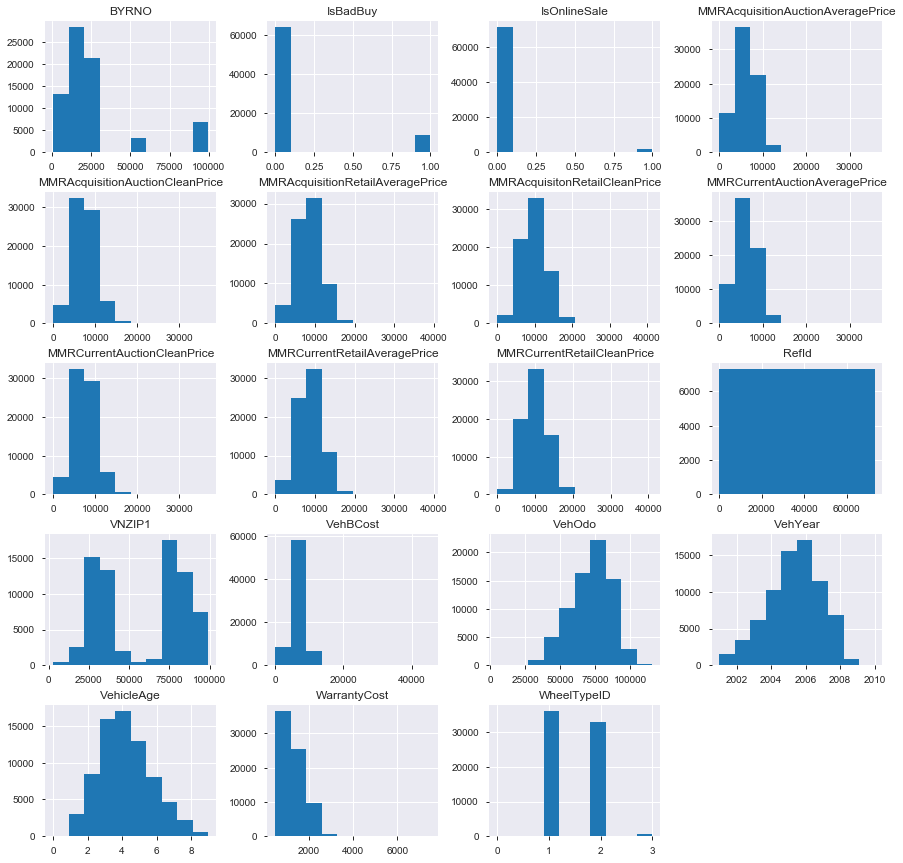

In [101]:
pd.DataFrame.hist(df, figsize= [15,15]);

##### Drop columns:
1. Ref ID
2. BYRNO
3. WheelTypeID

##### Numerical Columns:
1.  VehYear
2.  VehcileAge
3.  WarrantyCost
4.  VehOdo
5.  VehBCost
6.  VNZIP1
7.  MMRAcquisitionAuctionAveragePrice
8.  MMRAcquisitionAuctionCleanPrice
9.  MMRAcquisitionRetailAveragePrice
11. MMRAcquisitonRetailCleanPrice
12. MMRCurrentAuctionAveragePrice
13. MMRCurrentAuctionCleanPrice
14. MMRCurrentRetailAveragePrice
15. MMRCurrentRetailCleanPrice

##### Categorical Columns:
1. Auction
2. Transmission
3. WheelType
4. Nationality
5. Size
6. TopThreeAmericanName
7. IsOnlineSale

##### Fix NULLs
1. Trim
2. AUCGUART
3. PRIMEUNIT
4. ALL Price Cols

In [102]:
#Lets looks a a data profiling report using pandas_profiling API
#pandas_profiling.ProfileReport(df)

### Correlation analysis

In [103]:
df_new_corr = df.copy()
df_new_corr = df_new_corr.drop(['RefId','PurchDate','Auction','Make','Model','Size','TopThreeAmericanName','PRIMEUNIT','AUCGUART',
                              'Trim','SubModel','Color','Transmission','WheelType','Nationality','BYRNO','VNST'],axis=1)
correlations = df_new_corr.corr()['IsBadBuy'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 VNZIP1          0.005796
WarrantyCost    0.052319
VehOdo          0.082560
VehicleAge      0.167164
IsBadBuy        1.000000
Name: IsBadBuy, dtype: float64

Most Negative Correlations: 
 VehYear                             -0.158886
MMRAcquisitionAuctionAveragePrice   -0.109252
MMRCurrentAuctionAveragePrice       -0.109112
MMRCurrentAuctionCleanPrice         -0.104020
MMRCurrentRetailAveragePrice        -0.103914
Name: IsBadBuy, dtype: float64


# Let's plot a heatmap to visualize the correaltion between IsBadBuy and other attributes

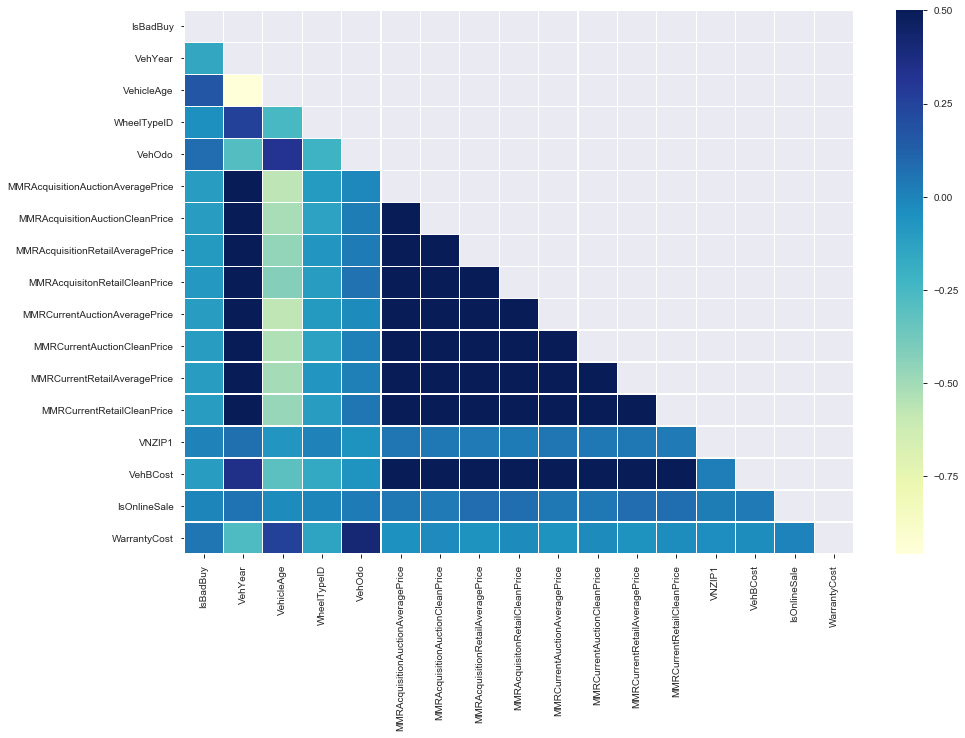

In [104]:
# Calculate correlations
corr = df_new_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

> As seen in the profile report above, the price attributes are highliy correlated to each other. <p>
> VehAge, WarrantCost and VehOdo are the most correlated attributes

### Dataprocessing
1. Dropping columms

In [105]:
raw_df = df
# Dropping columns
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#dropping the target variable
#df = df.drop('IsBadBuy', axis=1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 32 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

>Has NULL Values:

>1. Trim
>2. AUCGUART
>3. PRIMEUNIT
>4. ALL Price Cols

>Numerical Variables:

>1. VehYear
>2. VehicleAge
>3. VehOdi
>4. VNZIP1
>5. VehCost
>6. All Price Columns

>Categorical Variables:

>1. Auction
>2. Transmission
>3. WheelType
>4. Nationality
>5. Size
>6. TopThreeAmericanName
>7. IsOnlineSale

> The target variable IsBadBuy a binary classifcation variable, meaning we are assigned a value of 1 if the car purchased in a Bad buy or 0 if a car is not a Bad buy (good buy).

> It is important to note that while doing this prediction we need to be careful about the high cost of predicting false negatives. This means that a dealership might think that this car is a good buy and think they would be able to sell it, however in reality this a actually a Bad Buy and not sellable.

> A false postive has a cost associated with it as well, if the purchase as classified as a Bad buu in realilty it is indeed a sellable car, then the delearship might loose the opportunity selling the used car and generating profit of it.

>Quesitons:

>1.There is no column in the Test data provided from the Kaggle Competetion, does this mean that I have to use Cross Validation sampling to split the Training Data into either 5 folds to 10 folds and also how can I know how many number of folds to choose in this case?

>2.WheelType has 3174 / 4.3% missing values Missing
>WheelTypeID has 3169 / 4.3% missing values Missing
>I thought both should have mostly same missing values, but they do not.



>Clarifications:
>1. Auction: This is the expected price of the car at an Auction.
>2. MMR: This is Manheim Market Report, which is an indicator of wholesale prices of a car determined by a very establised company that provides very statistically sounds whole car price determinations.
>3. Acquisition: This is the price at which the car's MMR sold at the auction. 
>4. Retail: This mean the expected price of the car which the customer is willing to pay at the dealership.
>5. VNST and VNZIP1 are state and zip codes
>6. TopAmericanName: If the vechicle is from one of the top three american car manufacturers.

>nearest neighbhors for categorials or look at similar cars look at high correlated variables understand the missing data and then find solutions

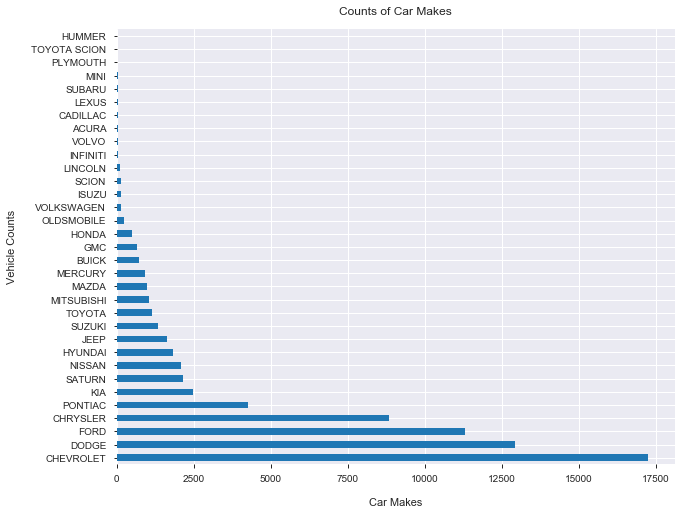

In [107]:
df['Make'].value_counts().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Car Makes", labelpad=14)
plt.ylabel("Vehicle Counts", labelpad=14)
plt.title("Counts of Car Makes", y=1.02);

In [108]:
#replace Manual with MANUAL
df['Transmission'].replace(to_replace =['Manual'],
                           value ="MANUAL",inplace=True)

In [109]:
df['Transmission'].value_counts()

AUTO      70398
MANUAL     2576
Name: Transmission, dtype: int64

In [110]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,7451.0,8552.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,7456.0,9222.0,11374.0,12791.0,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,4035.0,5557.0,7146.0,8702.0,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,1844.0,2646.0,4375.0,5518.0,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,3247.0,4384.0,6739.0,7911.0,19638,33619,FL,4000.0,0,1020


In [111]:
import re

# Write a pattern to extract numbers and decimals
def return_eng_size(length):
    pattern = re.compile(r"\d+\.\d[lL]")
    
    # Search the text for matches
    size = re.search(pattern, length)
    
    # If a value is returned, use group(0) to return the found value
    if size is not None:
        return str(size.group(0))
    else:
        return str("Missing")
    
df["EngineSize"] = df['Model'].apply(lambda x: return_eng_size(x))

In [112]:
# Write a pattern to extract numbers and decimals
def return_veh_char(length):
    pattern = re.compile(r"4WD|2WD|AWD|FWD|V8|V6|4C|6C|DOHC|MPI|SFI*|MFI|EFI*")
    
    # Search the text for matches
    veh_char = re.search(pattern, str(length))
    
    # If a value is returned, use group(0) to return the found value
    if veh_char is not None:
        return str(veh_char.group(0))
    else:
        return str("Missing")
    
df["VehileEngChar"] = df['Model'].apply(lambda x: return_veh_char(x))

In [113]:
df["VehileEngCharSub"] = df['SubModel'].apply(lambda x: return_veh_char(x))

In [114]:
df["VehileEngChar"].value_counts()

Missing    21514
V6         14525
2WD        11009
4C          9727
FWD         7197
4WD         3429
MPI         1701
EFI         1442
SFI         1314
AWD          751
MFI          201
V8            65
DOHC          56
EF            26
SF            18
6C             8
Name: VehileEngChar, dtype: int64

In [115]:
df['VehEngChar'] = df.apply(lambda x: 'AWD' if x['VehileEngChar'] == 'AWD' or x['VehileEngCharSub'] == 'AWD' else x['VehileEngChar'], axis=1)

In [116]:
df['VehEngChar'].value_counts()

Missing    21450
V6         14475
2WD        11009
4C          9727
FWD         7197
4WD         3429
MPI         1701
EFI         1441
SFI         1314
AWD          866
MFI          201
V8            65
DOHC          56
EF            26
SF            18
6C             8
Name: VehEngChar, dtype: int64

In [117]:
df = df.drop(['VehileEngChar','VehileEngCharSub'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

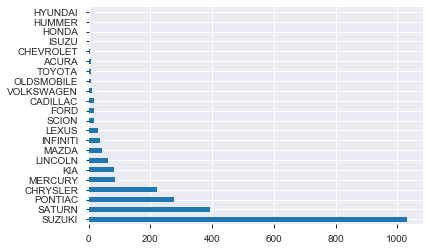

In [118]:
empty_trim_df = df[df['Trim'].isnull()]
empty_trim_df['Make'].value_counts().plot(kind='barh')

In [119]:
# imputing the missing values for categorical values
#cat_cols = ['Auction','Make','Trim','TopThreeAmericanName','Model','SubModel','Color', 
#            'Transmission', 'WheelType','Nationality','Size', 'VNST']
df.head()
print(df['Trim'].isnull().value_counts())

from collections import Counter
def mostcomm(x):
    return x.replace(np.nan, Counter(x).most_common()[0][0])

df['TrimNew'] = df.groupby(('Make','Model','SubModel')).Trim.apply(mostcomm)
df['TrimNew'].isnull().value_counts()

df_tmp = (df.groupby(('Make','Model','SubModel')))
df_tmp[['Make','Model','SubModel','Trim','TrimNew']].head()


df['TrimClean'] = df['Trim'].fillna(df['Trim'].value_counts().index[0])
df['TrimClean'].isnull().value_counts()
df = df.drop(['Trim','TrimNew'], axis=1)

False    70623
True      2360
Name: Trim, dtype: int64


M:\Python\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.

M:\Python\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



In [120]:
# Write a pattern to extract numbers and decimals
def return_eng_cylnd(length):
    pattern = re.compile(r"([vViI]\d|[vViI]\s\d|[vViI]\-\d)")
    
    # Search the text for matches
    eng_cylnd = re.search(pattern, length)
    
    # If a value is returned, use group(0) to return the found value
    if eng_cylnd is not None:
        return str(eng_cylnd.group(0))
    else:
        return str("Missing")
    
df["VehileEngCylinder"] = df['Model'].apply(lambda x: return_eng_cylnd(x))

In [121]:
df.EngineSize.value_counts()

Missing    48532
2.4L        3777
3.5L        3126
2.0L        2635
3.0L        2511
2.2L        2444
2.7L        2031
3.8L        1628
3.4L        1403
3.9L         637
3.3L         522
4.7L         500
4.0L         485
3.7L         418
1.6L         392
2.3L         389
4.2L         286
3.1L         261
2.5L         256
1.8L         187
5.3L         136
5.7L         109
4.8L          79
4.6L          78
1.9L          62
1.5L          42
5.9L          20
3.2L          15
1.7L          10
3.6L          10
4.5L           2
Name: EngineSize, dtype: int64

In [122]:
def fix_eng_vals(x):
    if x == "I-4":
        return str("I4")
    elif x == "I 4":
        return str("I4")
    elif x == "I-2":
        return str("I2")
    elif x == "I 2":
        return str("I2")
    elif x == "I-3":
        return str("I3")
    elif x == "I 3":
        return str("I3")
    elif x == "I-6":
        return str("I6")
    elif x == "I 6":
        return str("I6")
    elif x == "V-6":
        return str("V6")
    elif x == "V 6":
        return str("V6")
    elif x == "V-4":
        return str("V4")
    elif x == "V 4":
        return str("V4")
    elif x == "V-2":
        return str("V2")
    elif x == "V 2":
        return str("V2")
    else:
        return x

df["VehEngCylndr"] = df['VehileEngCylinder'].apply(lambda x: fix_eng_vals(x))

In [123]:
df["VehEngCylndr"].value_counts()
df.drop(['VehileEngCylinder'],axis=1,inplace=True)

In [124]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,SubModel,Color,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,EngineSize,VehEngChar,TrimClean,VehEngCylndr
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,4D SEDAN I,RED,...,21973,33619,FL,7100.0,0,1113,Missing,Missing,i,Missing
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,QUAD CAB 4.7L SLT,WHITE,...,19638,33619,FL,7600.0,0,1053,Missing,2WD,ST,Missing
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,MAROON,...,19638,33619,FL,4900.0,0,1389,Missing,V6,SXT,V6
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,4D SEDAN,SILVER,...,19638,33619,FL,4100.0,0,630,Missing,Missing,SXT,Missing
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,2D COUPE ZX3,SILVER,...,19638,33619,FL,4000.0,0,1020,Missing,Missing,ZX3,Missing


In [125]:
df['Model'].value_counts()

PT CRUISER              2329
IMPALA                  1990
TAURUS                  1425
CALIBER                 1375
CARAVAN GRAND FWD V6    1289
MALIBU 4C               1225
TAURUS 3.0L V6 EFI      1160
SEBRING 4C              1157
COBALT                  1106
PT CRUISER 2.4L I4 S    1104
1500 RAM PICKUP 2WD     1101
IMPALA V6               1062
STRATUS V6 2.7L V6 M     991
FOCUS                    909
GRAND PRIX               885
GRAND PRIX 3.8L V6 S     862
IMPALA 3.5L V6 SFI       827
ION                      720
MALIBU 4C 2.2L I4 MP     715
ALTIMA                   681
AVENGER 4C               679
SPECTRA                  674
FORENZA                  649
1500 SILVERADO PICKU     596
MALIBU V6                586
G6 V6                    555
HHR                      549
STRATUS V6               543
UPLANDER FWD V6          542
FIVE HUNDRED             525
                        ... 
RODEO 2WD 4C MFI I-4       1
MONTERO 4WD V6 3.8L        1
IMPALA 5.3L V8 SFI         1
S60           

In [126]:
#The data set contains several numerical and categorial attributes
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'VehOdo', 'BYRNO',
        'VNZIP1', 'IsOnlineSale', 'WarrantyCost'],
       dtype='object'),
 dtype('float64'): Index(['WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
        'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
        'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
        'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
        'MMRCurrentRetailCleanPrice', 'VehBCost'],
       dtype='object'),
 dtype('O'): Index(['PurchDate', 'Auction', 'Make', 'Model', 'SubModel', 'Color',
        'Transmission', 'WheelType', 'Nationality', 'Size',
        'TopThreeAmericanName', 'VNST', 'EngineSize', 'VehEngChar', 'TrimClean',
        'VehEngCylndr'],
       dtype='object')}

In [127]:
null_df = df[['MMRCurrentRetailCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentAuctionCleanPrice',
            'MMRCurrentAuctionAveragePrice','MMRAcquisitionRetailAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
             'MMRAcquisitonRetailCleanPrice','MMRAcquisitionAuctionAveragePrice','Color','SubModel',
             'TopThreeAmericanName','Nationality','Size']].isnull().sum().sort_values(ascending=False)
print(null_df)

MMRCurrentAuctionAveragePrice        315
MMRCurrentAuctionCleanPrice          315
MMRCurrentRetailAveragePrice         315
MMRCurrentRetailCleanPrice           315
MMRAcquisitionAuctionAveragePrice     18
MMRAcquisitonRetailCleanPrice         18
MMRAcquisitionAuctionCleanPrice       18
MMRAcquisitionRetailAveragePrice      18
SubModel                               8
Color                                  8
Size                                   5
Nationality                            5
TopThreeAmericanName                   5
dtype: int64


### Regressing Current Prices based on Acquisition Prices

In [128]:
df_num = df.copy(deep=True)

In [129]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

clf = linear_model.LinearRegression()
degree = 3
polynomial_features = PolynomialFeatures(degree = degree, include_bias = True)
pipeline = Pipeline([("polynomial_features", polynomial_features), ("classifier", clf)])

non_null_train = df_num[(pd.notnull(df_num.MMRAcquisitionAuctionAveragePrice)) &
  (pd.notnull(df_num.MMRAcquisitionAuctionCleanPrice)) &
  (pd.notnull(df_num.MMRAcquisitionRetailAveragePrice)) &
  (pd.notnull(df_num.MMRAcquisitonRetailCleanPrice)) &
  (pd.notnull(df_num.MMRCurrentAuctionAveragePrice)) &
  (pd.notnull(df_num.MMRCurrentAuctionCleanPrice)) &
  (pd.notnull(df_num.MMRCurrentRetailAveragePrice)) &
  (pd.notnull(df_num.MMRCurrentRetailCleanPrice))]

null_mask = ((pd.notnull(df_num.MMRAcquisitionAuctionAveragePrice)) &
  (pd.notnull(df_num.MMRAcquisitionAuctionCleanPrice)) &
  (pd.notnull(df_num.MMRAcquisitionRetailAveragePrice)) &
  (pd.notnull(df_num.MMRAcquisitonRetailCleanPrice)) &
  (pd.isnull(df_num.MMRCurrentAuctionAveragePrice)) &
  (pd.isnull(df_num.MMRCurrentAuctionCleanPrice)) &
  (pd.isnull(df_num.MMRCurrentRetailAveragePrice)) &
  (pd.isnull(df_num.MMRCurrentRetailCleanPrice)))

null_predict = df_num[null_mask]

X = non_null_train[['MMRAcquisitionAuctionAveragePrice',
  'MMRAcquisitionAuctionCleanPrice',
  'MMRAcquisitionRetailAveragePrice',
  'MMRAcquisitonRetailCleanPrice',
  'VehicleAge',
  'VehOdo'
]]

X_predict = null_predict[['MMRAcquisitionAuctionAveragePrice',
  'MMRAcquisitionAuctionCleanPrice',
  'MMRAcquisitionRetailAveragePrice',
  'MMRAcquisitonRetailCleanPrice',
  'VehicleAge',
  'VehOdo'
]]

for target in ['MMRCurrentAuctionAveragePrice', 
               'MMRCurrentAuctionCleanPrice', 
               'MMRCurrentRetailAveragePrice', 
               'MMRCurrentRetailCleanPrice']:
    y = non_null_train[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=123)
    pipeline.fit(X_train, y_train)
    print(pipeline.score(X_train, y_train))
    print(pipeline.score(X_test, y_test))
    result = pipeline.predict(X_predict)
    df_num.loc[null_mask, target] = result

0.8968697965080711
0.8888799525847134
0.8898333763814336
0.8808664593855817
0.8625852736065148
0.853233191780567
0.8539167767848349
0.8438427139110934


In [130]:
df_num[['MMRCurrentAuctionAveragePrice', 
        'MMRCurrentAuctionCleanPrice', 
        'MMRCurrentRetailAveragePrice', 
        'MMRCurrentRetailCleanPrice']].isnull().sum()

MMRCurrentAuctionAveragePrice    18
MMRCurrentAuctionCleanPrice      18
MMRCurrentRetailAveragePrice     18
MMRCurrentRetailCleanPrice       18
dtype: int64

### Imputing the remaining missing numerical values

In [131]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

num_df = df.select_dtypes(include=[np.number])

imputer.fit(num_df)

X = imputer.transform(num_df)

num_df = pd.DataFrame(X, columns=num_df.columns.values)

num_df.head()

num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 19 columns):
RefId                                72983 non-null float64
IsBadBuy                             72983 non-null float64
VehYear                              72983 non-null float64
VehicleAge                           72983 non-null float64
WheelTypeID                          72983 non-null float64
VehOdo                               72983 non-null float64
MMRAcquisitionAuctionAveragePrice    72983 non-null float64
MMRAcquisitionAuctionCleanPrice      72983 non-null float64
MMRAcquisitionRetailAveragePrice     72983 non-null float64
MMRAcquisitonRetailCleanPrice        72983 non-null float64
MMRCurrentAuctionAveragePrice        72983 non-null float64
MMRCurrentAuctionCleanPrice          72983 non-null float64
MMRCurrentRetailAveragePrice         72983 non-null float64
MMRCurrentRetailCleanPrice           72983 non-null float64
BYRNO                                72983 non-null

In [132]:
# All the price columns are related as per the report above.
avg_prices_cols = ['MMRAcquisitionAuctionAveragePrice',
              'MMRAcquisitionAuctionCleanPrice',
              'MMRAcquisitionRetailAveragePrice',
              'MMRAcquisitonRetailCleanPrice',              
              'MMRCurrentAuctionAveragePrice',
              'MMRCurrentAuctionCleanPrice',
              'MMRCurrentRetailAveragePrice',
              'MMRCurrentRetailCleanPrice']

#df['AvgAuctionPrice'] = sum(df[i] for i in avg_prices_cols) / len(avg_prices_cols) 
#df = df.drop(avg_prices_cols, axis=1)

In [133]:
empty_trim_df = df[df['Trim'].isnull()]
empty_trim_df['Make'].value_counts().plot(kind='barh',figsize=(10, 8))
plt.xlabel("Count of Car Makes with Nulls", labelpad=14)
plt.ylabel("Car Makes", labelpad=14)
plt.title("Count Null values by Car Manufacturer", y=1.02);

KeyError: 'Trim'

> Suzuki cars have a lot of their Trim values missing in the data set.
> Will be using categorical imputation for filling missing values by most common occurance by using fancy impute package

In [ ]:
# Take a copy of the data frame so far
clean_df = df.copy()

#Extract date features and drop the date column
clean_df['PurchDate'] = pd.to_datetime(clean_df['PurchDate'])

# Adding new features from the Purchase date
clean_df['PurchDay'] = clean_df['PurchDate'].apply(lambda x:x.day)
clean_df['PurchMon'] = clean_df['PurchDate'].apply(lambda x:x.month)
clean_df['PurchYear'] = clean_df['PurchDate'].apply(lambda x:x.year)

#Remove columns deemed not necessary since we already extracted its features
clean_df = clean_df.drop(['PurchDate'],axis=1)

In [ ]:
print("Missing values in the dataset:")
print(clean_df.isnull().sum())
print("\n")
print("% of missing values:")
print(clean_df.isnull().mean()*100)

In [ ]:
# Analysis of Missing Values using missingno package in Python
import missingno as msno

#Plot the missing no bar chart
msno.bar(clean_df)

In [ ]:
#plot the matrix to show 
msno.matrix(clean_df)

In [ ]:
# Plot the heat to show any correlation between missing values, for example, wheel type
msno.heatmap(clean_df)

In [ ]:
# Plot the Dendrogram for futher analysis for distance between like missing values
msno.dendrogram(clean_df)

### EDA

In [ ]:
import plotly.figure_factory as ff

# Add histogram data
x1 = clean_df.loc[clean_df['IsBadBuy'] == 0, 'VehicleAge']
x2 = clean_df.loc[clean_df['IsBadBuy'] == 1, 'VehicleAge']
hist_data = [x1, x2]
group_labels = ['Good Buys', 'Bad Buys']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
#Add Title
fig['layout'].update(title='VehicleAge in Percent by Purchase Type Good/Bad')
# Plot
fig.show()

In [ ]:
x = (clean_df[(clean_df['IsBadBuy'] == 1) & (clean_df['IsOnlineSale'] == 1)].shape[0]/ clean_df[clean_df['IsOnlineSale'] == 1].shape[0])*100
print("IsOnlineSale = {:.1f}%".format(x))
y = (clean_df[(clean_df['IsBadBuy'] == 1) & (clean_df['IsOnlineSale'] == 0)].shape[0] / clean_df[clean_df['IsOnlineSale'] == 0].shape[0])*100
print("Not IsOnlinebSale = {:.1f}%".format(y))

In [ ]:
x = clean_df[clean_df['IsBadBuy'] == 0]['VehicleAge'].mean()
print("Avg Vehcile Age for Non Bad Buy: {:.1f}".format(x))
y = clean_df[clean_df['IsBadBuy'] == 1]['VehicleAge'].mean()
print("Avg Vehcile Age for Bad Buy: {:.1f}".format(y))

In [ ]:
### import plotly.figure_factory as ff
import numpy as np
##import chart_studio.plotly as py
import plotly.figure_factory as ff

#token='ZNwWfjtxe8O5DLdMxTUy'
#chart_studio.tools.set_credentials_file(username='vidya.sadhanala', api_key=token)
# Add histogram data
x1 = clean_df.loc[clean_df['IsBadBuy'] == 0, 'VehYear']
x2 = clean_df.loc[clean_df['IsBadBuy'] == 1, 'VehYear']
# Group data together
hist_data = [x1, x2]
group_labels = ['Non Bad Buys', 'Bad Buys']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Vehicle Years in Percent by Purchase Type Good/Bad')
# Plot
fig.show()

In [ ]:
import plotly.figure_factory as ff
x1 = clean_df.loc[clean_df['IsBadBuy'] == 0, 'WarrantyCost']
x2 = clean_df.loc[clean_df['IsBadBuy'] == 1, 'WarrantyCost']
# Group data together
hist_data = [x1, x2]
group_labels = ['Non Bad Buys', 'Bad Buys']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='WarrantyCost in Percent by Purchase Type Good/Bad')
# Plot
fig.show()

In [ ]:
import plotly.express as px
data = clean_df
fig = px.box(data, x="IsBadBuy", y="MMRAcquisitionAuctionAveragePrice")
fig.show()

In [ ]:
fig = px.box(data, x="IsBadBuy", y="MMRAcquisitionAuctionCleanPrice")
fig.show()

In [ ]:
fig = px.box(data, x="IsBadBuy", y="WarrantyCost")
fig.show()

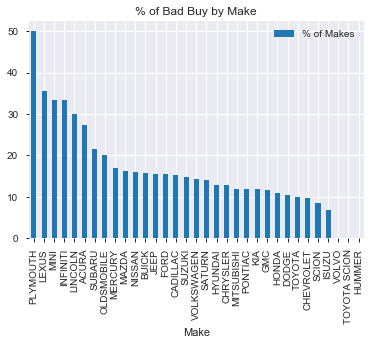

In [134]:
df_Make = pd.DataFrame(columns=["Make","% of Makes"])
i=0
for field in list(clean_df['Make'].unique()):
    ratio = clean_df[(clean_df['Make']==field)&(clean_df['IsBadBuy']==1)].shape[0] / clean_df[clean_df['Make']==field].shape[0]
    df_Make.loc[i] = (field, ratio*100)
    i += 1
df_DF1 = df_Make.groupby(by="Make").sum().sort_values(by = ['% of Makes','Make'],ascending=False)
df_DF1.plot(kind='bar',title='% of Bad Buy by Make')
_ = plt.show()

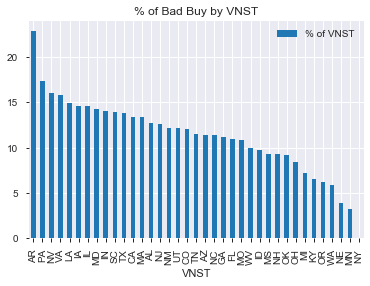

In [135]:
df_VNST = pd.DataFrame(columns=["VNST","% of VNST"])
i=0
for field in list(clean_df['VNST'].unique()):
    ratio = clean_df[(clean_df['VNST']==field)&(clean_df['IsBadBuy']==1)].shape[0] / clean_df[clean_df['VNST']==field].shape[0]
    df_VNST.loc[i] = (field, ratio*100)
    i += 1
df_DF4 = df_VNST.groupby(by="VNST").sum().sort_values(by = ['% of VNST','VNST'],ascending=False)
df_DF4.plot(kind='bar',title='% of Bad Buy by VNST')
_ = plt.show()

In [136]:
df_bad_st = clean_df[clean_df['IsBadBuy'] == 1]
df_bad_st['VNST'].value_counts()

TX    1877
FL    1142
CA     951
NC     799
AZ     704
CO     604
SC     594
OK     331
GA     273
VA     263
TN     203
MD     165
PA     147
UT     106
NV      90
AL      88
MO      82
IA      73
IN      68
IL      67
OH      67
LA      52
MS      46
NJ      40
NM      29
WV      29
ID      19
AR      16
KY      15
OR      13
NH       9
WA       8
MA       2
MN       2
NE       1
MI       1
Name: VNST, dtype: int64

### Hypothesis Testing

In [137]:
from scipy import stats

#H0 : WarrantyCost are no different between BadBuys and Good Buys
#HA : WarrantyCosts are differnt between BadBuys and GoodBuys

x1 = clean_df.loc[clean_df['IsBadBuy'] == 0, 'WarrantyCost']
x2 = clean_df.loc[clean_df['IsBadBuy'] == 1, 'WarrantyCost']

t_stat, p_val = stats.ttest_ind(x2, x1)

print("T Statistic:{}".format(t_stat))
print("\n")
print("p values:{}".format(p_val))
print("\n")
if p_val < .05:
    print("Reject Null Hypothesis and Accept Alternate Hypothesis\n")
else:
    print('Fail to Reject Null Hypothesis')

T Statistic:14.15343276320538


p values:2.042953346325851e-45


Reject Null Hypothesis and Accept Alternate Hypothesis



In [138]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [139]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [140]:
# Compute the difference of the sample means: mean_diff
m1 = clean_df.loc[clean_df['IsBadBuy'] == 0, 'WarrantyCost']
m2 = clean_df.loc[clean_df['IsBadBuy'] == 1, 'WarrantyCost']
mean_diff = np.mean(m2) - np.mean(m1)

# Get bootstrap replicates of means
m1_replicates = draw_bs_reps(m1, np.mean, 10000)
m2_replicates = draw_bs_reps(m2, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
diff_replicates = m2_replicates - m1_replicates

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(diff_replicates,[2.5,97.5])
print('95% Confidence Interval:{}\n'.format(conf_int))

# Print the Margin of Error
margin_or_err = (conf_int[0] - conf_int[1])/2
print('Margin of Error:{}\n'.format(margin_or_err))

# Print the results
print('difference of means =', mean_diff)
print('95% confidence interval =', conf_int)

95% Confidence Interval:[ 80.67142636 110.32956486]

Margin of Error:-14.829069249697802

difference of means = 95.39837348971719
95% confidence interval = [ 80.67142636 110.32956486]


In [141]:
# Take a copy of the data frame for Categrorical imputation
cars_df = clean_df.copy(deep=True)

# Drop the columns that are not needed like numerical and categorical values that are fully existing in the data set.
cars_df = cars_df.drop(['Auction','VehYear','VehicleAge','Make','Model','VehOdo','BYRNO','VNZIP1','VNST',
                        'VehBCost','IsOnlineSale','WarrantyCost','WheelTypeID','IsBadBuy','MMRAcquisitionAuctionAveragePrice',
                       'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice',
                       'MMRCurrentRetailCleanPrice'],axis=1)

### Data pre-processing

In [142]:
# Categorical variables selected for imputation
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 15 columns):
RefId                   72983 non-null int64
Trim                    70623 non-null object
SubModel                72975 non-null object
Color                   72975 non-null object
Transmission            72974 non-null object
WheelType               69809 non-null object
Nationality             72978 non-null object
Size                    72978 non-null object
TopThreeAmericanName    72978 non-null object
EngineSize              72983 non-null object
VehEngChar              72983 non-null object
VehEngCylndr            72983 non-null object
PurchDay                72983 non-null int64
PurchMon                72983 non-null int64
PurchYear               72983 non-null int64
dtypes: int64(4), object(11)
memory usage: 8.4+ MB


In [143]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in cars_df:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = cars_df[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    cars_df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [144]:
#clean_df.info()
from fancyimpute import SimpleFill
# Create SimpleFill imputer
Simple_imp = SimpleFill("mean")

# Impute and round the users DataFrame
#clean_df.iloc[:, :] = np.round(KNN_imputer.fit_transform(clean_df))
cars_df.iloc[:, :] = np.round(Simple_imp.fit_transform(cars_df))


# Loop over the column names in users
for col_name in cars_df:
    
    # Reshape the data
    reshaped = cars_df[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    cars_df[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

In [145]:
# View to the imputed data frame
cars_df.head(5)

# merging the numerical and categorical variables data frames
final_df = pd.merge(num_df, cars_df, on='RefId')

# Variables in the final data frame before addressing class imbalance
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 0 to 72982
Data columns (total 33 columns):
RefId                                72983 non-null float64
IsBadBuy                             72983 non-null float64
VehYear                              72983 non-null float64
VehicleAge                           72983 non-null float64
WheelTypeID                          72983 non-null float64
VehOdo                               72983 non-null float64
MMRAcquisitionAuctionAveragePrice    72983 non-null float64
MMRAcquisitionAuctionCleanPrice      72983 non-null float64
MMRAcquisitionRetailAveragePrice     72983 non-null float64
MMRAcquisitonRetailCleanPrice        72983 non-null float64
MMRCurrentAuctionAveragePrice        72983 non-null float64
MMRCurrentAuctionCleanPrice          72983 non-null float64
MMRCurrentRetailAveragePrice         72983 non-null float64
MMRCurrentRetailCleanPrice           72983 non-null float64
BYRNO                                72983 non-null

In [146]:
final_df.head()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,...,WheelType,Nationality,Size,TopThreeAmericanName,EngineSize,VehEngChar,VehEngCylndr,PurchDay,PurchMon,PurchYear
0,1.0,0.0,2006.0,3.0,1.0,89046.0,8155.0,9829.0,11636.0,13600.0,...,Alloy,OTHER ASIAN,MEDIUM,OTHER,Missing,Missing,Missing,7,12,2009
1,2.0,0.0,2004.0,5.0,1.0,93593.0,6854.0,8383.0,10897.0,12572.0,...,Alloy,AMERICAN,LARGE TRUCK,CHRYSLER,Missing,2WD,Missing,7,12,2009
2,3.0,0.0,2005.0,4.0,2.0,73807.0,3202.0,4760.0,6943.0,8457.0,...,Covers,AMERICAN,MEDIUM,CHRYSLER,Missing,V6,V6,7,12,2009
3,4.0,0.0,2004.0,5.0,1.0,65617.0,1893.0,2675.0,4658.0,5690.0,...,Alloy,AMERICAN,COMPACT,CHRYSLER,Missing,Missing,Missing,7,12,2009
4,5.0,0.0,2005.0,4.0,2.0,69367.0,3913.0,5054.0,7723.0,8707.0,...,Covers,AMERICAN,COMPACT,FORD,Missing,Missing,Missing,7,12,2009


In [147]:
# Since over 95% values are missing in PRIMEUNIT and AUCGUART variables, removing these columns
#final_df = final_df.drop(['PRIMEUNIT','AUCGUART'],axis=1)

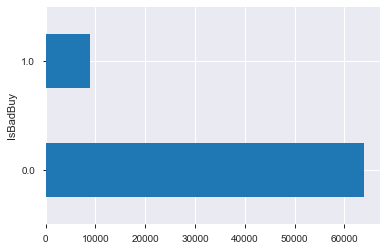

In [148]:
# Plot the class imbalance in the data set
df_grpd = final_df.groupby(['IsBadBuy']).size().plot.barh(x="IsBadBuy",y="Vehicle Counts")

In [149]:
#Import package
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = final_df[final_df.IsBadBuy==0]
df_minority = final_df[final_df.IsBadBuy==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=64007,    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.IsBadBuy.value_counts()

1.0    64007
0.0    64007
Name: IsBadBuy, dtype: int64

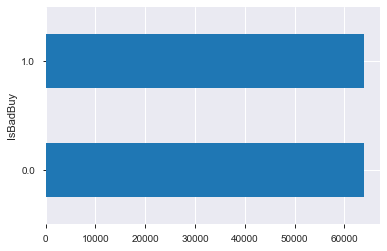

In [150]:
df_grpd_upsam = df_upsampled.groupby(['IsBadBuy']).size().plot.barh(x="IsBadBuy",y="Vehicle Counts")

In [151]:
#Copy upsmaples DataFrame
data = df_upsampled.copy(deep=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128014 entries, 0 to 13760
Data columns (total 33 columns):
RefId                                128014 non-null float64
IsBadBuy                             128014 non-null float64
VehYear                              128014 non-null float64
VehicleAge                           128014 non-null float64
WheelTypeID                          128014 non-null float64
VehOdo                               128014 non-null float64
MMRAcquisitionAuctionAveragePrice    128014 non-null float64
MMRAcquisitionAuctionCleanPrice      128014 non-null float64
MMRAcquisitionRetailAveragePrice     128014 non-null float64
MMRAcquisitonRetailCleanPrice        128014 non-null float64
MMRCurrentAuctionAveragePrice        128014 non-null float64
MMRCurrentAuctionCleanPrice          128014 non-null float64
MMRCurrentRetailAveragePrice         128014 non-null float64
MMRCurrentRetailCleanPrice           128014 non-null float64
BYRNO                               

#### Feature Selection
#### dropping WheelTypeID since WheelTypeName exists 
#### dropping ID variable RefID

In [152]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128014 entries, 0 to 13760
Data columns (total 33 columns):
RefId                                128014 non-null float64
IsBadBuy                             128014 non-null float64
VehYear                              128014 non-null float64
VehicleAge                           128014 non-null float64
WheelTypeID                          128014 non-null float64
VehOdo                               128014 non-null float64
MMRAcquisitionAuctionAveragePrice    128014 non-null float64
MMRAcquisitionAuctionCleanPrice      128014 non-null float64
MMRAcquisitionRetailAveragePrice     128014 non-null float64
MMRAcquisitonRetailCleanPrice        128014 non-null float64
MMRCurrentAuctionAveragePrice        128014 non-null float64
MMRCurrentAuctionCleanPrice          128014 non-null float64
MMRCurrentRetailAveragePrice         128014 non-null float64
MMRCurrentRetailCleanPrice           128014 non-null float64
BYRNO                               

### Machine Learning

In [153]:
#Copy upsmaples DataFrame
data = df_upsampled.copy(deep=True)

# Dropping varibles that are not neeeded and also target variables
X = data.drop(['RefId','WheelTypeID','IsBadBuy'], axis=1)

# target variable
y = data.IsBadBuy

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y)

In [155]:
# Make dummy variables over entire train/test set
def make_dummies(train_in, test_in, feature):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    train_set = list(set(train_in[feature].values))
    test_set = list(set(test_in[feature].values))
    encoder_set = list(set(train_set + test_set))
    le.fit(encoder_set)
    new_feature = le.transform(train_in[feature].values)
    train_in=train_in.drop(feature, axis=1)
    train_in[feature] = new_feature 
    new_feature = le.transform(test_in[feature].values)
    test_in=test_in.drop(feature, axis=1)
    test_in[feature] = new_feature
 
    return test_in, train_in

In [156]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [157]:
for feature in ['Trim','SubModel', 'Color' ,'Transmission', 'WheelType', 'Nationality',
                'Size', 'TopThreeAmericanName', 'EngineSize' ,'VehEngChar' ,'VehEngCylndr']:
    X_test, X_train = make_dummies(X_train, X_test, feature)

In [158]:
# # Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion ='gini', max_depth=30, random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.92


In [159]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("\n")

gini_predictions = gini(y_test, y_pred)
gini_max = gini(y_test, y_pred)
ngini= gini_normalized(y_test, y_pred)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

[[16140  3063]
 [  113 19089]]
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91     19203
         1.0       0.86      0.99      0.92     19202

    accuracy                           0.92     38405
   macro avg       0.93      0.92      0.92     38405
weighted avg       0.93      0.92      0.92     38405



Gini: 0.209, Max. Gini: 0.209, Normalized Gini: 0.836


In [160]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X_test
y_pred_knn = knn.predict(X_test)

# Accuracy Scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

f1_knn = metrics.f1_score(y_pred_knn, y_test)

print("F1 Score:"+str(f1_knn))

print("\n")

gini_predictions_knn = gini(y_test, y_pred_knn)
gini_max_knn = gini(y_test, y_pred_knn)
ngini_knn = gini_normalized(y_test, y_pred_knn)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions_knn, gini_max_knn, ngini_knn))

Accuracy: 0.8313240463481317
[[14219  4984]
 [ 1494 17708]]
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81     19203
         1.0       0.78      0.92      0.85     19202

    accuracy                           0.83     38405
   macro avg       0.84      0.83      0.83     38405
weighted avg       0.84      0.83      0.83     38405

F1 Score:0.8453716522652407


Gini: 0.166, Max. Gini: 0.166, Normalized Gini: 0.664


In [161]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', min_samples_split = 285)

RF.fit(X_train, y_train)

y_pred_rf = RF.predict(X_test)

f1_rf = metrics.f1_score(y_pred_rf, y_test)

print("F1 Score:"+str(f1_rf))


print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_rf))
print('\n')

metrics.classification_report(y_test, y_pred_rf)

print(metrics.classification_report(y_test, y_pred_rf))

importance = zip(RF.feature_importances_, X)

for rank in sorted(importance, key = lambda x: x[0], reverse = True):
    print(rank)
    
print("\n")

gini_predictions_rf = gini(y_test, y_pred_rf)
gini_max_rf = gini(y_test, y_pred_rf)
ngini_rf = gini_normalized(y_test, y_pred_rf)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions_rf, gini_max_rf, ngini_rf))

F1 Score:0.7543595155535453
Confusion matrix
[[13618  5585]
 [ 4191 15011]]


              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74     19203
         1.0       0.73      0.78      0.75     19202

    accuracy                           0.75     38405
   macro avg       0.75      0.75      0.75     38405
weighted avg       0.75      0.75      0.75     38405

(0.08970094385449691, 'TopThreeAmericanName')
(0.06782265662026365, 'VehicleAge')
(0.0672365136853862, 'MMRCurrentAuctionAveragePrice')
(0.06389520487468726, 'VehBCost')
(0.059180690759228875, 'VehYear')
(0.0565215944954232, 'MMRAcquisitionAuctionAveragePrice')
(0.05202170156386493, 'VehOdo')
(0.050838155554255963, 'MMRCurrentAuctionCleanPrice')
(0.0496652694573238, 'MMRCurrentRetailAveragePrice')
(0.04799672813035804, 'MMRAcquisitionAuctionCleanPrice')
(0.04628151171607402, 'BYRNO')
(0.04477853223602451, 'MMRCurrentRetailCleanPrice')
(0.03722981273099071, 'MMRAcquisitionRetailAveragePric

In [162]:
import xgboost as xgb
from matplotlib import pyplot

# instansitate xbg classifier
xg_cl = xgb.XGBRFClassifier(objective='binary:logistic', n_estimators=10,seed=123)

# Fit on train
xg_cl.fit(X_train, y_train)

#Predict on Test
y_pred_xgb = xg_cl.predict(X_test)

#Accuracy Scores
accuracy_xgb = float(np.sum(y_pred_xgb==y_test))/y_test.shape[0]

print('accuracy: %f' % (accuracy_xgb))

f1_xgb = metrics.f1_score(y_pred_xgb, y_test)

print("F1 Score:"+str(f1_xgb))

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
metrics.classification_report(y_test, y_pred_xgb)

print(metrics.classification_report(y_test, y_pred_xgb))

importance = zip(xg_cl.feature_importances_, X)

for rank in sorted(importance, key = lambda x: x[0], reverse = True):
    print(rank)

print("\n")

gini_predictions_xgb = gini(y_test, y_pred_xgb)
gini_max_xgb = gini(y_test, y_pred_xgb)
ngini_xgb = gini_normalized(y_test, y_pred_xgb)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions_xgb, gini_max_xgb, ngini_xgb))

accuracy: 0.623018
F1 Score:0.6403874813710879
Confusion matrix
[[11036  8167]
 [ 6311 12891]]


              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60     19203
         1.0       0.61      0.67      0.64     19202

    accuracy                           0.62     38405
   macro avg       0.62      0.62      0.62     38405
weighted avg       0.62      0.62      0.62     38405

(0.42494175, 'VehicleAge')
(0.19432454, 'VehYear')
(0.11668855, 'TopThreeAmericanName')
(0.08220072, 'VehBCost')
(0.060941577, 'MMRAcquisitionAuctionCleanPrice')
(0.05697047, 'MMRAcquisitionAuctionAveragePrice')
(0.044660557, 'BYRNO')
(0.019271856, 'WarrantyCost')
(0.0, 'VehOdo')
(0.0, 'MMRAcquisitionRetailAveragePrice')
(0.0, 'MMRAcquisitonRetailCleanPrice')
(0.0, 'MMRCurrentAuctionAveragePrice')
(0.0, 'MMRCurrentAuctionCleanPrice')
(0.0, 'MMRCurrentRetailAveragePrice')
(0.0, 'MMRCurrentRetailCleanPrice')
(0.0, 'VNZIP1')
(0.0, 'IsOnlineSale')
(0.0, 'Trim')
(0.0, 'SubMo

### Conclusion

#### Based on the different machine learning models applied so far for classifiying good and bar car buys at the auction, DecisionTreeClassifier seems be the most performant model of all based on the sensitivity of all the models compared.